In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

from sklearn.metrics import r2_score,mean_squared_error



In [2]:
df = pd.read_pickle('pickled_parquet_1.pkl')

In [3]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime', 'PUZone', 'DOZone'],
      dtype='object')

In [3]:
le=LabelEncoder()
df['PUday'] = le.fit_transform(df['PUday'])
df['PUtime'] = le.fit_transform(df['PUtime'])

NameError: name 'df' is not defined

In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime', 'PUZone', 'DOZone'],
      dtype='object')

In [5]:
dftrain = df[['passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','total_sec','PUhour','PUday']]

In [6]:
dftest = df['total_amount']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(dftrain,dftest,test_size=0.3)

In [59]:
#LINEAR REGRESSION

lregr = LinearRegression()
lregr.fit(x_train,y_train)
LR_y_test_pred = lregr.predict(x_test)


# ERROR METRICS

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,LR_y_test_pred))
print("RMSE: %f" % (rmse))

# The Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,LR_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,LR_y_test_pred))

accuracy = r2_score(y_test,LR_y_test_pred)
print ("Cross-Predicted Accuracy:", accuracy)

#plt.scatter(y_test,LR_y_test_pred)

RMSE: 4.155630
Mean squared error: 17.27
Variance score: 0.90
Cross-Predicted Accuracy: 0.8995171025254929


In [53]:
res_LR = LR_y_test_pred-y_test

/tmp/ipykernel_19945/2799066191.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  z[:5]


1536714    -2.755078
13821      -7.775709
91936     -16.474605
468179     -2.290040
1867200     0.674632
Name: total_amount, dtype: float64

In [54]:
res_LR.describe()

count    583158.000000
mean          0.008960
std           4.155624
min        -485.518590
25%          -1.065397
50%           0.457073
75%           1.638100
max         206.885097
Name: total_amount, dtype: float64

In [57]:
(predictions-dftest).describe()

count    1.943859e+06
mean    -2.365118e-02
std      4.301137e+00
min     -7.850701e+02
25%     -1.114969e+00
50%      4.256422e-01
75%      1.628879e+00
max      2.319848e+02
Name: total_amount, dtype: float64

Cross val score :  [0.90048818 0.89796103 0.89801647 0.8803965  0.88288822 0.89803196]
Cross-Predicted Accuracy: 0.8932144973506406


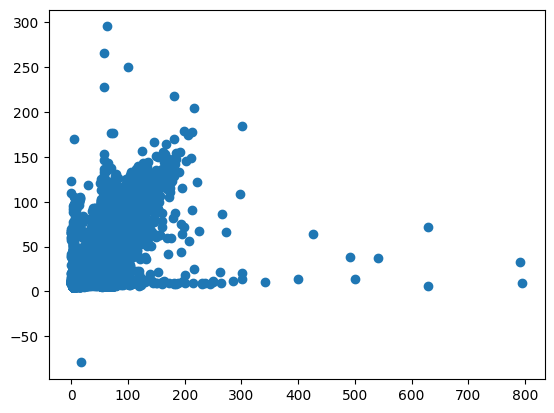

In [55]:
score = cross_val_score(lregr, dftrain, dftest,cv=6)
print('Cross val score : ',score)

    
predictions = cross_val_predict(lregr, dftrain, dftest, cv=6)
plt.scatter(dftest, predictions)

accuracy = r2_score(dftest,predictions)
print ("Cross-Predicted Accuracy:", accuracy)

## Decision Tree Regression


In [74]:
(y_test-RF_y_test_pred).describe()

count    583158.000000
mean         -0.011236
std           3.524511
min         -90.608736
25%          -1.582642
50%          -0.082642
75%           1.332466
max         443.512474
Name: total_amount, dtype: float64

In [65]:
# TRAINING USING DECISION TREE REGRESSOR MODEL

dtr = DecisionTreeRegressor().fit(x_train,y_train)
DTR_y_test_pred = dtr.predict(x_test)

# Error Metrics

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,DTR_y_test_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,DTR_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,DTR_y_test_pred))
plt.scatter(y_test,DTR_y_test_pred)

KeyboardInterrupt: 

## Random Forest Regression

In [81]:
# TRAINING USING DECISION TREE REGRESSOR MODEL

RF = RandomForestRegressor(n_estimators=6,max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=6)

In [84]:
RF_y_test_pred = RF.predict(x_test)

RMSE: 3.183880
Mean squared error: 10.14
Variance score: 0.94


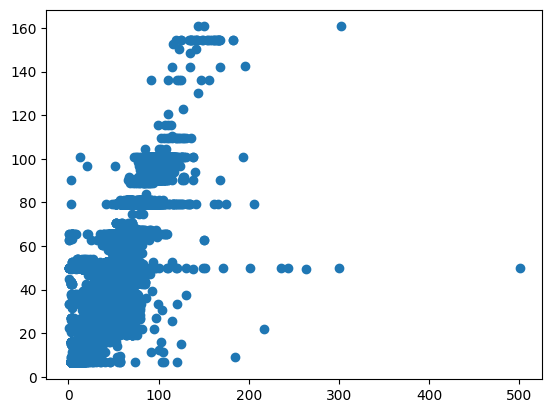

In [83]:
# Error Metrics

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,RF_y_test_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,RF_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,RF_y_test_pred))
plt.scatter(y_test,RF_y_test_pred)

In [6]:
!pip install shapely

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import geopandas as gpd

# Path to the "taxi_zones" shapefile
shapefile_path = "/home/user/Desktop/wheres-my-taxi/wheres-my-taxi/geo_export_4323a1fa-9e81-4f79-bb4c-9011fa40138e.shp"

# Read the shapefile into a GeoDataFrame
taxi_zones = gpd.read_file(shapefile_path)


In [11]:
from shapely.geometry import Point

# Example coordinates (replace with your actual coordinates)
latitude = 40.716278
longitude = -73.917156

# Create a Shapely Point
point = Point(longitude, latitude)

# Check which zone contains the point
matching_zone = taxi_zones[taxi_zones.geometry.contains(point)]

# Print the result
if not matching_zone.empty:
    zone_name = matching_zone.iloc[0]['zone']
    print(f"The coordinates are in the {(zone_name)} zone.")
else:
    print("No matching zone found.")


The coordinates are in the Maspeth zone.
